# Parkinson's Dataset

##### Report by Ben Wilson

## Introduction

##### Parkinson's Disease is a neurodegenerative disease that is typically diagnosed in older populations. Common symptoms include rigidity, decreased movement (this is called bradykinesia), tremors, issues with speech, irregular sleep, and the development of poorer posture. Risk factors for Parkinsons's are primarily hereditary (family history of the disorder) and environmental (exposure to certain pesticides or other harmful chemicals that have been linked to the diease). Males and older populations are more likely to develop Parkinson's than other populations. Potential ways that have been linked to a decreased chance to devleop Parkinson's include physical exercise and caffeine consumption.

## Dataset

In [3]:
import pandas as pd
from scipy import stats
import seaborn
from matplotlib import pyplot

In [29]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [4]:
%config InlineBackend.figure_format = 'retina'
seaborn.set_style(style='whitegrid')

###### First, we have to install the packages required for our code to work and customize our visualizations. Next, let's load the dataset.

In [7]:
parkinsons = pd.read_csv('parkinsons_disease_data.csv')
parkinsons.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

##### There are a few column headings that are unfamiliar to the borader public. UPDRS stands for Unified Parkinson's Disease Rating Scale, MoCA stands for Montreal Cognitive Assessment, and SystolicBP stands for Systolic Blood Pressure.

In [8]:
parkinsons.shape

(2105, 35)

##### In this dataset, there are 35 columns and 2185 rows. Many of the columns concern demographic information, such as education, age, gender, ethnicity. Others make note of potential risk factors and health-related matters for the patients, such as BMI, smoking habits, alocholo consumption, diet quality, and physical acitivty. Another main group of columns is comorbity, such as depression, diabetes, stroke, hypertension, and traumatic brain injuriies. Lastly, another group follows symptoms of the disease, such as speech problems, tremors, rigidity, bradykinesia, postural instability, and sleep disorders.

In [9]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

## Exploratory Data Analysis

In [10]:
parkinsons.Diagnosis.value_counts(normalize=True) * 100

Diagnosis
1    61.947743
0    38.052257
Name: proportion, dtype: float64

##### Around 62% of the participants in this dataset have been diagnoses with Parkinson's Disease.

In [14]:
parkinsons.groupby('Diagnosis').CholesterolTotal.mean()

Diagnosis
0    227.917357
1    226.211859
Name: CholesterolTotal, dtype: float64

##### The means for both groups are relatively similar, suggesting there is no significant difference in the averages of both groups.

In [16]:
parkinsons.groupby('Diagnosis').AlcoholConsumption.mean()

Diagnosis
0     9.774184
1    10.203948
Name: AlcoholConsumption, dtype: float64

In [17]:
parkinsons.groupby('Diagnosis').Smoking.mean()

Diagnosis
0    0.293383
1    0.298313
Name: Smoking, dtype: float64

In [18]:
parkinsons.groupby('Diagnosis').Age.mean()

Diagnosis
0    68.635456
1    70.195552
Name: Age, dtype: float64

##### As shown before, it appears there is no siginficant difference between the means of these groups when separated by a Parkinson's diagnosis. This suggests a diagnosis of Parkinson's Disease has little bearing on evaluations like alcohol consumption, smoking habits, and age.

In [23]:
pd.crosstab(parkinsons.Tremor, parkinsons.Diagnosis)

Diagnosis,0,1
Tremor,,
0,594,602
1,207,702


In [24]:
pd.crosstab(parkinsons.Rigidity, parkinsons.Diagnosis)

Diagnosis,0,1
Rigidity,,
0,681,892
1,120,412


In [25]:
pd.crosstab(parkinsons.SpeechProblems, parkinsons.Diagnosis)

Diagnosis,0,1
SpeechProblems,,
0,559,925
1,242,379


In [26]:
pd.crosstab(parkinsons.Bradykinesia, parkinsons.Diagnosis)

Diagnosis,0,1
Bradykinesia,,
0,711,957
1,90,347


In [38]:
pd.crosstab(parkinsons.Gender, parkinsons.Diagnosis)

Diagnosis,0,1
Gender,,
0,415,653
1,386,651


## Data Visualization

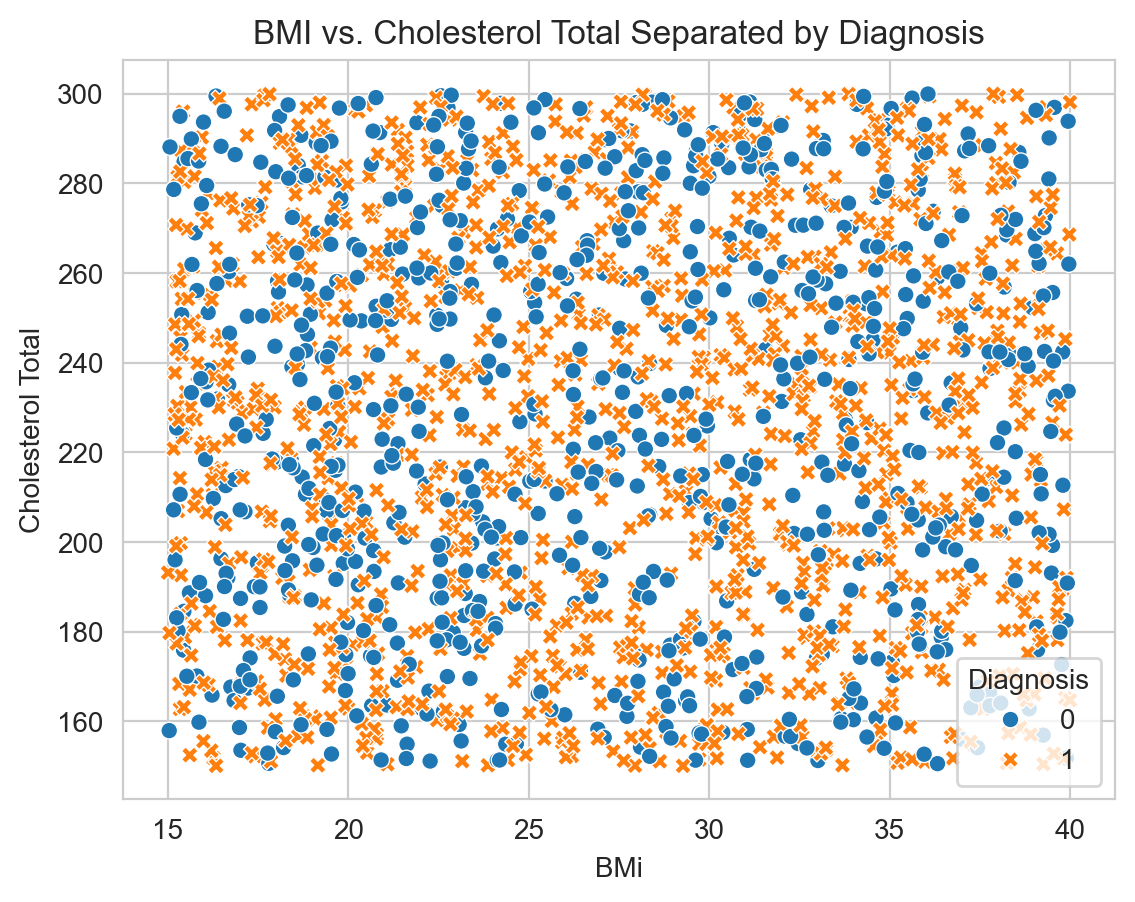

In [12]:
seaborn.scatterplot(
    data=parkinsons,
    x='BMI',
    y='CholesterolTotal',
    hue='Diagnosis',
    style='Diagnosis'
).set(
    title='BMI vs. Cholesterol Total Separated by Diagnosis',
    xlabel='BMi',
    ylabel='Cholesterol Total'
);

##### The data in this scatterplot is very noisy. Instead, it may prove more fruitful to compare cholesterol and a Parkinson's diagnosis using a box-and-whisker plot.

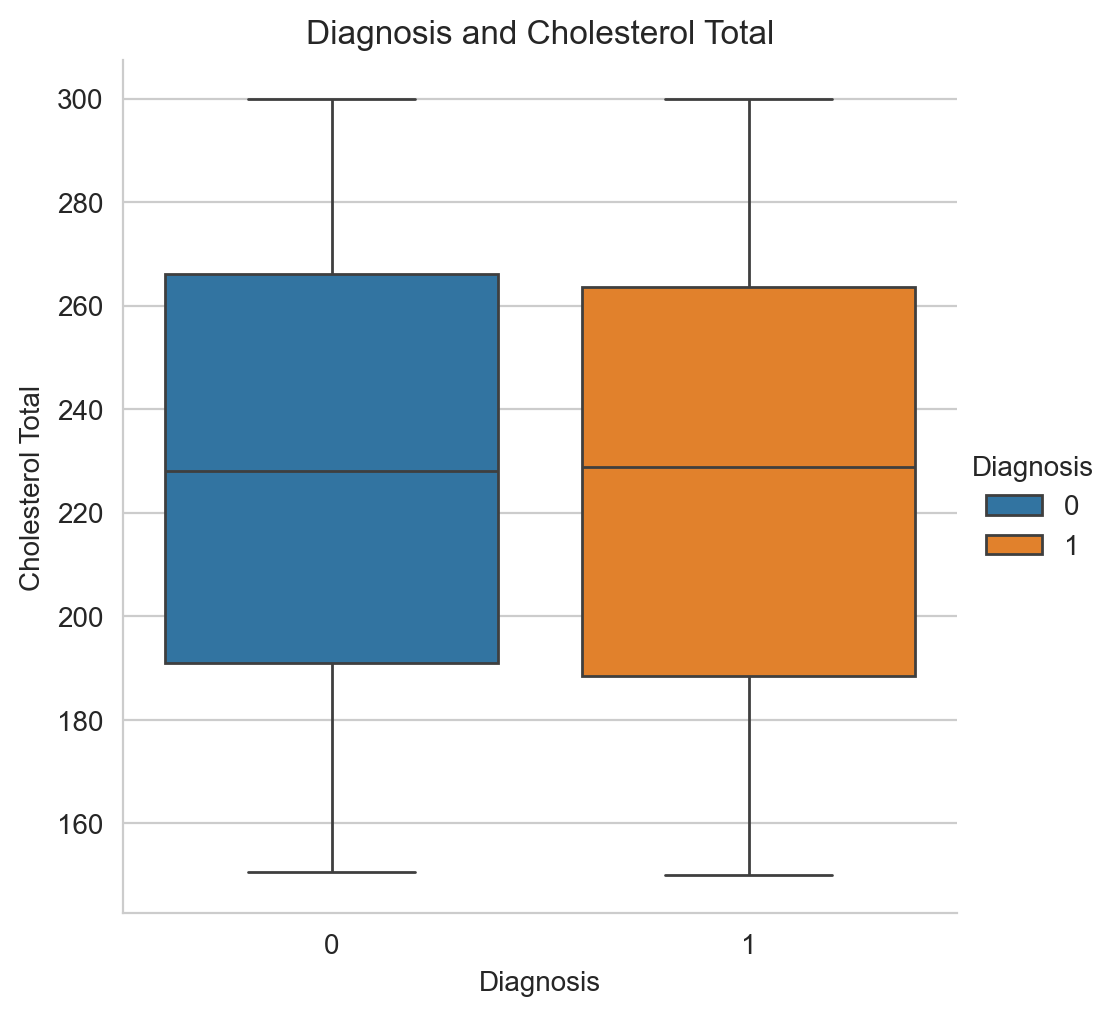

In [13]:
seaborn.catplot(
    data=parkinsons,
    x='Diagnosis',
    y='CholesterolTotal',
    hue='Diagnosis',
    kind='box'
).set(
    title='Diagnosis and Cholesterol Total',
    xlabel='Diagnosis',
    ylabel='Cholesterol Total'
);

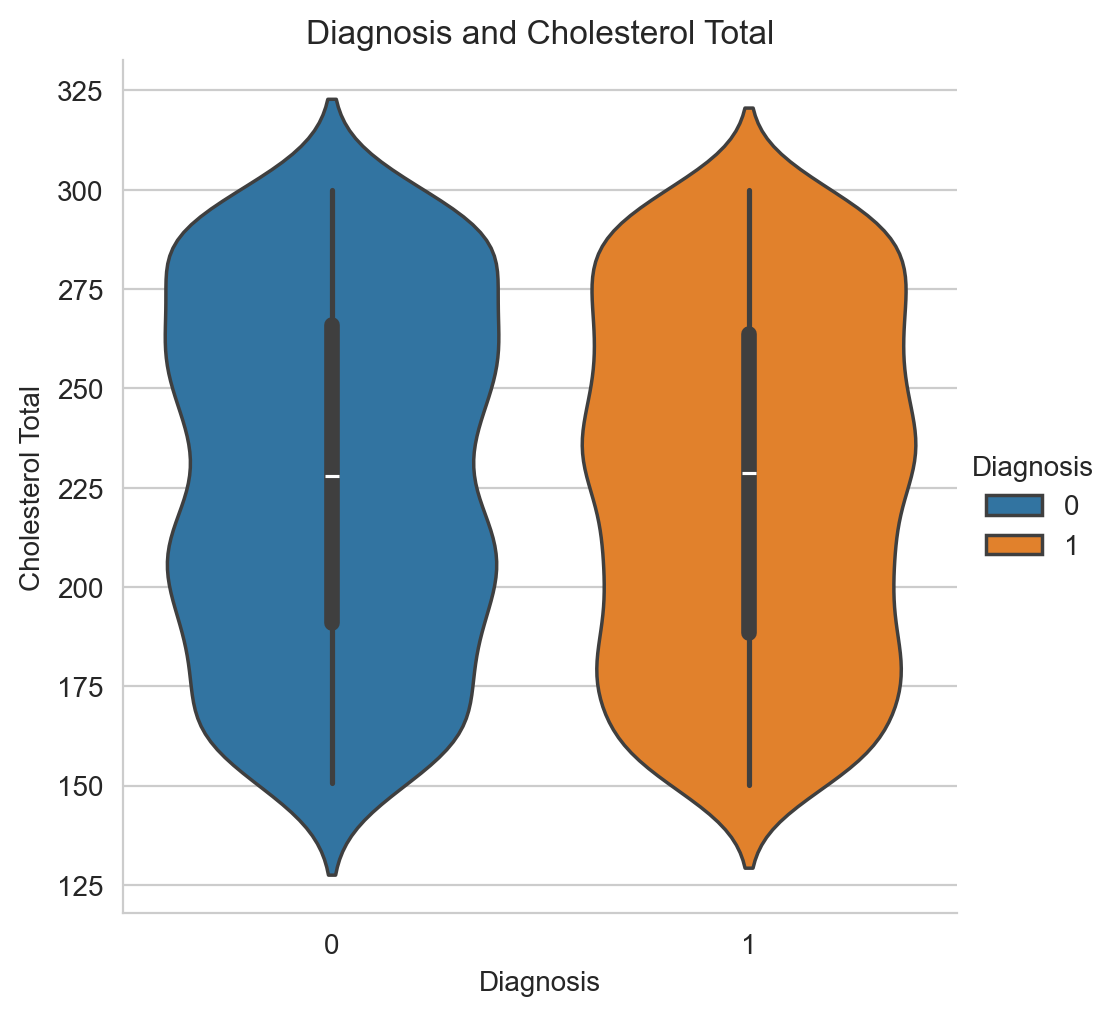

In [20]:
seaborn.catplot(
    data=parkinsons,
    x='Diagnosis',
    y='CholesterolTotal',
    hue='Diagnosis',
    kind='violin'
).set(
    title='Diagnosis and Cholesterol Total',
    xlabel='Diagnosis',
    ylabel='Cholesterol Total'
);

##### Based on this visualization, it appears that there is no significant difference in cholesterol between those who have been diagnosed with Parkinson's and those who have not. This contrasts some of the research in the introduction.

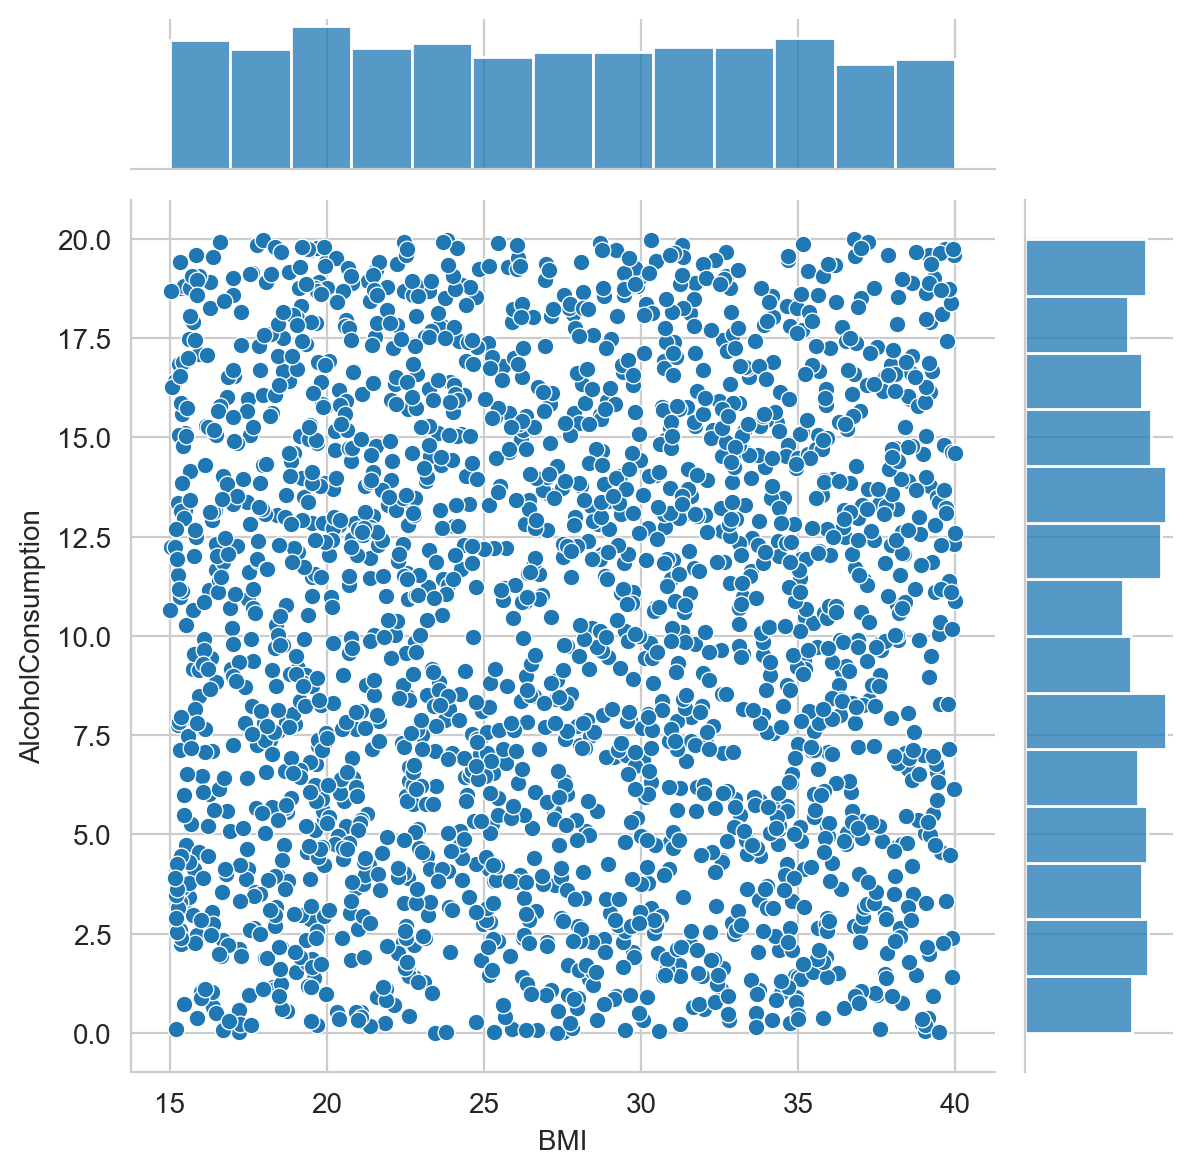

In [19]:
seaborn.jointplot(
    parkinsons,
    x='BMI',
    y='AlcoholConsumption'
);

In [37]:
go.Figure(data=go.Scatter(x=parkinsons.AlcoholConsumption, y=parkinsons.BMI,
    mode='markers',
    marker=dict(size=12))).update_layout(title='Parkinsons Disease: BMI vs. Alcohol Consumption',
        yaxis=dict(title='BMI'),
        xaxis=dict(title='Alcohol Consumption')).update_layout(
            width=700
        )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'size': 12},
              'mode': 'markers',
              'type': 'scatter',
              'x': {'bdata': ('Kb4ooNZuFEBYs9bDTxwYQMep7qXk7w' ... '7wmxhAGIefnaqx0j+EQQ2G58L/Pw=='),
                    'dtype': 'f8'},
              'y': {'bdata': ('7oCBUrCeM0AyFXSeUT8wQB1PzciJvC' ... 'li1DZAHs2F2vveMEBkxcM355EwQA=='),
                    'dtype': 'f8'}}],
    'layout': {'template': '...',
               'title': {'text': 'Parkinsons Disease: BMI vs. Alcohol Consumption'},
               'width': 700,
               'xaxis': {'title': {'text': 'Alcohol Consumption'}},
               'yaxis': {'title': {'text': 'BMI'}}}
})

## Conclusion

##### Currently, this dataset has many hurdles to overcome in order to produce more significant analysis and visualizations. The visualizations currently appear muddled due to the large observation size and numerous binary variables. Many of the trends in this report do not match traditionally understood facts about Parkinson's Disease.

## Works Cited

##### 
1. https://www.mayoclinic.org/diseases-conditions/parkinsons-disease/symptoms-causes/syc-20376055
2. https://www.movementdisorders.org/MDS/MDS-Rating-Scales/MDS-Unified-Parkinsons-Disease-Rating-Scale-MDS-UPDRS.htm